# Exponential integral in Python

Exponential integrals, $E_n(f) = \int_1^\infty \frac{e^{-xt}}{t^n}dt$, are important because they appear while considering analitical solution of radiative transfer equation (read about Schwarzschild-Milne equations). For example the radiation density $J_\nu(\tau_\nu)$ can be given by:
$$
J_\nu(\tau_\nu) = \Lambda_{\tau_\nu}[S_\nu(t_\nu)]
$$
Where lambda operator $\Lambda_{\tau_\nu}[S_\nu(t_\nu)]$ is defined by:
$$
\Lambda_\tau[f(t)] = \frac{1}{2} \int_0^\infty S_\nu(t_\nu)E_1(|t_\nu -\tau_\nu|)dt_\nu
$$

For completeness:
$$
H_\nu(\tau_\nu) = \frac{1}{2} \int_{\tau_\nu}^\infty S_\nu(t_\nu)E_2(t_\nu -\tau_\nu)dt_\nu - \frac{1}{2} \int_0^{\tau_\nu} S_\nu(t_\nu)E_2(\tau_\nu - t_\nu)dt_\nu = \Phi_{\tau_\nu}[S_\nu(t_\nu)]
$$
$$
K_\nu(\tau_\nu) = \frac{1}{2} \int_0^\infty S_\nu(t_\nu)E_3(|t_\nu -\tau_\nu|)dt_\nu = X_{\tau_\nu}[S_\nu(t_\nu)]
$$

Because of that exponential integrals othen appears when considering stellar atmosphere problem.

## Python example

### Exponential integrals

[Exponential integrals](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.expn.html#scipy.special.expn) are easly availible in Python [SciPy](https://docs.scipy.org/doc/scipy-0.14.0/reference/index.html) module. 

Text(0.5, 1.0, 'y = E_1(x)')

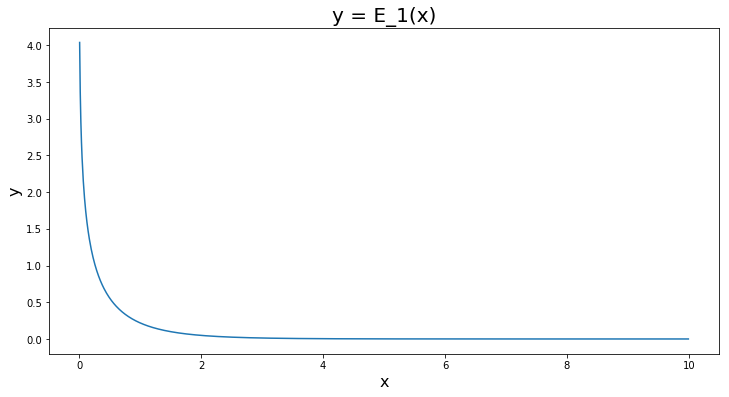

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import expn # importing exponential integrals function

n= 1
x= np.arange(0,10,0.01)
y= expn(n, x)

plt.figure(figsize=(12,6))
plt.plot(x, y)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title(f"y = E_{n}(x)", fontsize=20)

### Integrating

With python is also easy to integrate some complicated function. Check [simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps).

For example:
$$
S(\tau) = a\tau+b
$$
$$
J(\tau) = \Lambda_\tau[S(t)]
$$

Text(0, 0.5, '$S(\\tau)$')

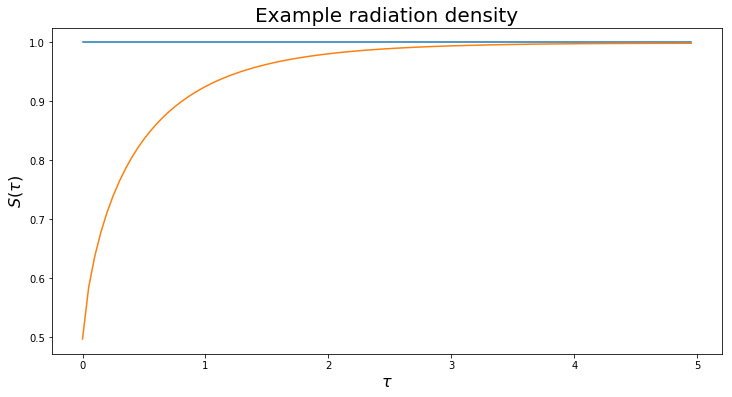

In [3]:
from scipy.integrate import simps

def S_linear(tau, a, b):
    return a*tau + b

def Lambda(S_function, tau):
    under_integral_funtion = lambda t, tau: S_function(t)*expn(1, np.abs(t - tau))
    
    # numerical 0 to infinity integration of under_integral_funtion:
    J_tau = np.empty_like(tau)
    integral_t = np.arange(0.001, 10, 0.005)
    for i, tt in enumerate(tau):
        y = simps(under_integral_funtion(integral_t, tt), x=integral_t)
        J_tau[i] = 0.5*y
        
    return J_tau

a= 0
b= 1
tau= np.arange(0, 5, 0.05)
S= lambda tau: S_linear(tau, a=a, b=b)

J_tau= Lambda(S, tau) # Call operator on source function S, at grid \tau

plt.figure(figsize=(12,6))
plt.plot(tau, S(tau))
plt.plot(tau, J_tau)
plt.title("Example radiation density", fontsize=20)
plt.xlabel(r"$\tau$", fontsize=16)
plt.ylabel(r"$S(\tau)$", fontsize=16)